# Lecture 2.3: Expectation–Maximization (EM) Algorithm  

### Motivating Example  

1) If $X$ comes from a mixture of two Normal distributions, $N_1(0, 1)$ and $N_2(3, 1)$, with probabilities 0.4 and 0.6, i.e.,    

$$ X_1 \sim N_1(0, 1) $$  
$$ X_2 \sim N_2(3, 1) $$  
$$ X = 0.4 X_1 + 0.6 X_2 $$  

* What is the PDF of $X$?  
* If we observe one data point, x = 2, what is the probability that it comes from $N_1(0, 1)$? What is the probability that it comes from $N_2(3, 1)$?  

2) We observed the following set of data.  

* What do we see in the plot of the data?  

* How can we model the data?  

* How do we estimate the parameters in the model?  

In [5]:
mdata = read.csv("data/mixdata.csv")
head(mdata)

,x
1,0.2528515
2,-1.034562
3,3.319558
4,4.552363
5,-0.7759947
6,2.937873


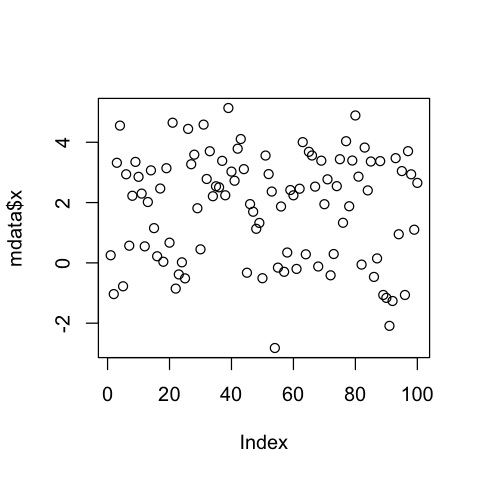

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(mdata$x)

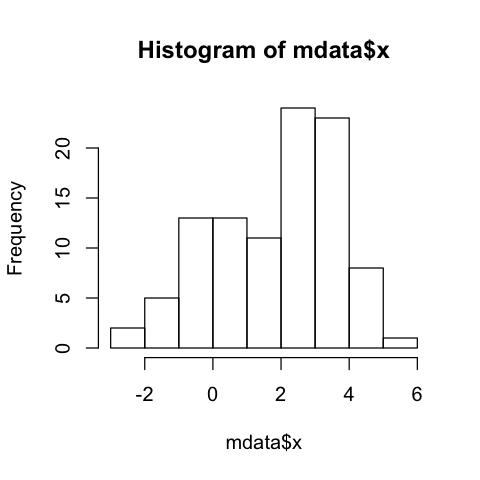

In [7]:
hist(mdata$x)

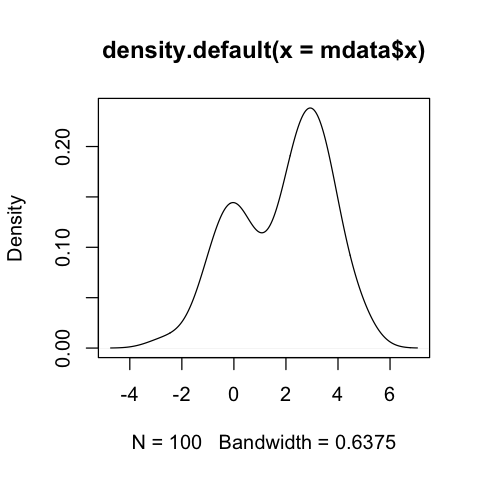

In [8]:
plot(density(mdata$x))

## The EM Algorithm  

> In statistics, an expectation–maximization (EM) algorithm is an iterative method for finding maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.  -- [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)

The setup of the problem:  

* A set of observed data, $X$    
* A set of unobserved latent data or missing values $Z$  
* A vector of unknown parameters $\theta$  
* We want to find the MLE of $\theta$ by maximizing the likelihood function of the observed data:  

$$ L(\theta | X) = f(X | \theta) = \sum_Z f(X, Z | \theta) $$

**Quiz**: In the data we explored, what is $X$? What is $Z$? What is $\theta$? Assume the data comes from a mixture of Normal/Gaussian distributions, write down the likelihood function of the observed data.  

Since $Z$ is not observed, we can not maximize the likelihood function directly. The EM algorithm seeks to find the MLE by iteratively applying the following two steps:  

### Expectation step (E step)  

Calculate the expected value of the log likelihood function, with respect to the conditional distribution of $Z$  given $X$ under the current estimate of the parameters $\theta^{(t)}$:  

$$ Q(\theta | \theta^{(t)}) = E_{Z | X, \theta^{(t)}} \left[ log \text{ } L( \theta | X, Z) \right] $$

### Maximization step (M step)  

Find the parameter that maximizes this quantity:  

$$ \theta^{(t + 1)} = argmax_{\theta} \text{ } Q(\theta | \theta^{(t)}) $$

The general precedure of the EM algorithem:  

1. Initialize the parameters $\theta$ 
2. Compute the best value for $Z$ given $\theta$  
3. Use the computed values of $Z$ to compute a better estimate for the $\theta$  
4. Iterate steps 2 and 3 until convergence

**Example: Mixture Normal/Gaussian**  

In the Normal mixture example, we have two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$. The PDF is  

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  

$X$ is the observed data, $Z$ is the unobserved class membership.   

Let $Z = 1$ if the data comes from the first Normal, and $0$ otherwise, then $E(Z) = w$.  

* In the E step we can obtain:   

$$ \pi_i = E(Z \ | \  x_i, \theta^{(t)}) = \frac{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}})}{w^{(t)} \ f_1(x_i \ |\ \mu_1^{(t)}, \sigma_1^{2^{(t)}}) + (1 - w^{(t)}) \ f_2(x_i \ |\ \mu_2^{(t)}, \sigma_2^{2^{(t)}})} $$

* In the M step, we have the familiar MLE of the parameters:  

$$ \mu_1^{(t + 1)} = \frac{\sum_{i = 1}^n \pi_i x_i}{\sum_{i = 1}^n \pi_i} $$



$$ \sigma_1^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n \pi_i (x_i - \mu_1^{(t + 1)})^2}{\sum_{i = 1}^n \pi_i} $$  



$$ \mu_2^{(t + 1)} = \frac{\sum_{i = 1}^n (1 - \pi_i) x_i}{\sum_{i = 1}^n (1 - \pi_i)} $$



$$ \sigma_2^{2^{(t + 1)}} = \frac{\sum_{i = 1}^n (1 - \pi_i) (x_i - \mu_2^{(t + 1)})^2}{\sum_{i = 1}^n (1 - \pi_i)} $$  



$$ w^{(t + 1)} = \frac{1}{n} \sum_{i = 1}^n \ \pi_i $$  

* Iterate these steps until convergence.  

We will implement these steps in today's lab.